Some data has a location associated with them. Things like per city/country populations or general election votes and the like can be bound to a location somewhere. If you have data like this then being able to plot, or represent this data somehow on a map can be of massive help. It allows you to spot trends in areas and visually recognise groups in your data as well as being a fantastic method of communicating your results to people.

The tool that we will be using to create our map visualisation is Matplotlib Basemap. Now this tool is actually not part of the Matplotlib package, so you’ll have to install it separately.

I hope for your sake that you are using Anaconda; if you are you can simply run the command conda install basemap. If you are not using Anaconda, then you are going to have to spend a bit of time manually installing it. You can find information on how to manually install Basemap here.

To draw a map in Basemap you first need to know a few things:

* Where you want your map to be centred
* The latitude and longitude of the lower left corner of the bounding box around the area you want to map.
* The latitude and longitude of the upper right corner of the bounding box around the area you want to map.
* Instead of the corners of the bounding box you can also use the width and height of the area you want to map in metres.

http://boundingbox.klokantech.com/

First go to this very useful website and you will be presented with a world map. In the top left corner of the map there is a button with a cursor icon on, click that and draw a box around the area you want to map.

At the bottom there is a box with some longitude and latitudes in. To the left of that there is a drop down menu, click that and select DublinCore; this is the easiest format to understand in my opinion and it’s in a form that can be directly used in Basemap. The first two numbers labeled ‘westlimit’ and ‘southlimit’ are the latitude and longitude of your lower left corner. The other two, labelled ‘eastlimit’ and ‘northlimit’ are the latitude and longitude of your upper right corner.

Now we have the information we need to be able to draw our map, we can get to writing some code and actually producing a basic map. Now note that in this post the data I will be using to plot points and such on a map is the 2015 England and Wales Property prices and so I will be drawing the UK. I will provide links to all the data I used in this visualisation, but by all means use your own and make a completely different map. In fact, I recommend you do!

First we will import the packages that we will be using.

https://matplotlib.org/basemap/

I was running in the same problem (Python 3.5 and Anaconda) and eventually downloaded Basemap 1.0.8dev0 from here and installed it using conda (as described by the link).

https://anaconda.org/conda-forge/basemap ( to install basemap for 3.5)

http://www.datadependence.com/2016/06/creating-map-visualisations-in-python/



First we will import the packages that we will be using.

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

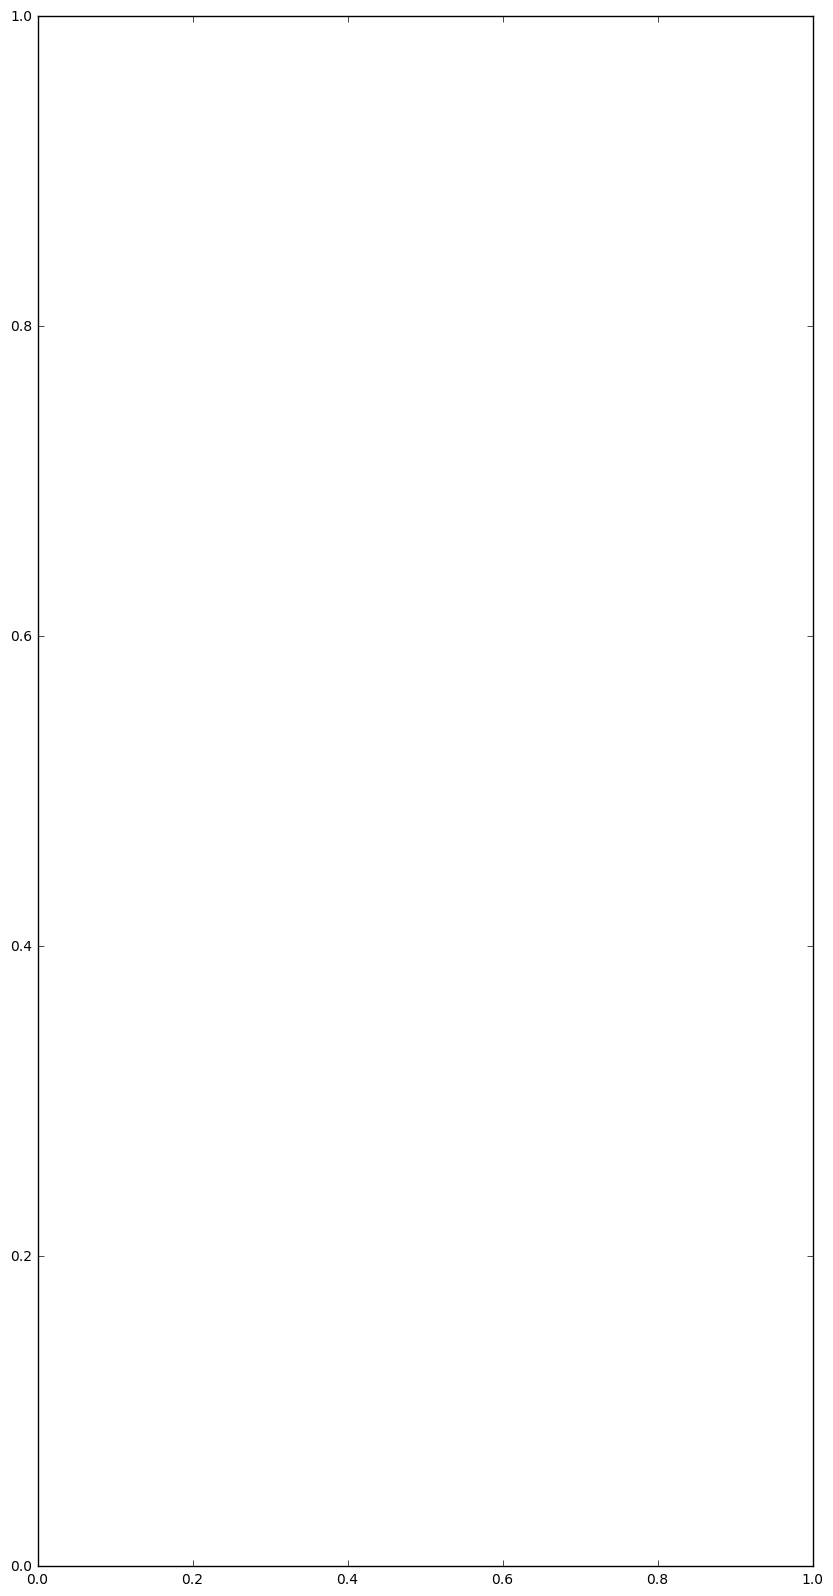

In [13]:
#Next we will create a figure to draw our map on and set its size.
fig, ax = plt.subplots(figsize=(10,20))

<function matplotlib.pyplot.show>

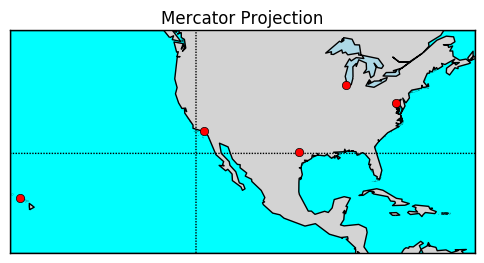

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

austin = (-97.75, 30.25)
hawaii = (-157.8, 21.3)
washington = (-77.01, 38.90)
chicago = (-87.68, 41.83)
losangeles = (-118.25, 34.05)

m = Basemap(projection = 'merc', llcrnrlat=10, urcrnrlat=50,
        llcrnrlon=-160, urcrnrlon=-60)

m.drawcoastlines()
m.fillcontinents (color='lightgray', lake_color='lightblue')
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')

m.drawcounties()

x, y = m(*zip(*[hawaii, austin, washington, chicago, losangeles]))
m.plot(x,y, marker ='o', markersize=6, markerfacecolor='red', linewidth=0)

plt.title('Mercator Projection')
plt.show

In [23]:
#We can create our map with the below code.
m = Basemap(resolution='c', # c, l, i, h, f or None
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-11.56, llcrnrlat= 51.34, urcrnrlon= -5.19, urcrnrlat=55.5)

Now, there are a fair amount of arguments here, but they are all pretty easy to understand. The ‘resolution’ argument is the quality of the map you are creating. The options are crude, low, intermediate, high or full. The higher the resolution the longer it takes to render the map, and it can take a very long time so I recommend that while you are working on your map, set it to crude, and then if and when you want to publish it set it to full.

The ‘projection’ is the type of map that you want to draw. There are lots of types that you can use that all have different use cases so I recommend you take a look at the available ones here. http://matplotlib.org/basemap/users/mapsetup.html

The ‘lat_0’ and ‘lon_0’ are the latitude and longitude of the centre point of your map. The other arguments are the latitudes and longitudes of your bounding box corners. ‘llcrnr’ stands for ‘lower left corner’ and ‘urcrnr’ stands for upper right corner. Fill these in with the latitudes and longitudes that you got earlier.

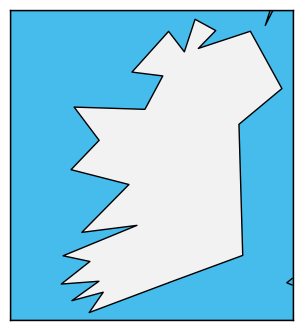

In [24]:
#Now we just need to define how the map is to be displayed and we have our basic map.
%matplotlib inline
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()

With the drawmapboundary() function we can set the colour of the seas and oceans on our map. Here I have set it to a light blue colour. The fillcontinents() function does just as it suggests, this is the colour of land masses. I have set them to a light-grey colour and have set lakes to the same colour as I set the sea. Finally the drawcoastlines() function draws lines around the land masses.

You should now have a map looking a bit like this. Obviously the area will be different if you chose a different place and the colours will vary too if you changed those. Also note that this map has been drawn using the crude setting.

PLOTTING DATA POINTS ONTO A MAP

We now have our map, but what we really want to do is to use it to communicate our data, so let’s plot some points on it.

Now as mentioned before I will be using England and Wales property price data. You can download this data here. I also have done a bit of data analysis and manipulation on this that you will also need to do if you want to produce the same map as me. I’m not going to go into what I did here as it doesn’t fit the scope of this post, but the notebook that I did this all in can be found here. I will be plotting newly built houses.

Plotting points onto a Basemap map is very easy. A few things to note about the below code though, are that my data is stored in a Pandas DataFrame called new_areas, the location of these areas are in new_areas.pos and the number of newly built houses in that area is in new_areas.count.

In [25]:
def plot_area(pos):
    count = new_areas.loc[new_areas.pos == pos]['count']
    x, y = m(pos[1], pos[0])
    size = (count/1000) ** 2 + 3
    m.plot(x, y, 'o', markersize=size, color='#444444', alpha=0.8)
    
new_areas.pos.apply(plot_area)

NameError: name 'new_areas' is not defined